In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib
from scipy import optimize
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
matplotlib.rcParams['figure.figsize'] = (11., 7.)

For $\gamma$, medical sources state that the average COVID case lasts about 14 days, which would give us an estimate of $\gamma = \frac{1}{14} = 0.07$. However, some cases can last several weeks. According to the second blog post, $\gamma$ ranges from $0.03-0.06$.

In [3]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url)
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378


# Fitting US Data

Here, we're estimating $\beta$ using data from the United States.

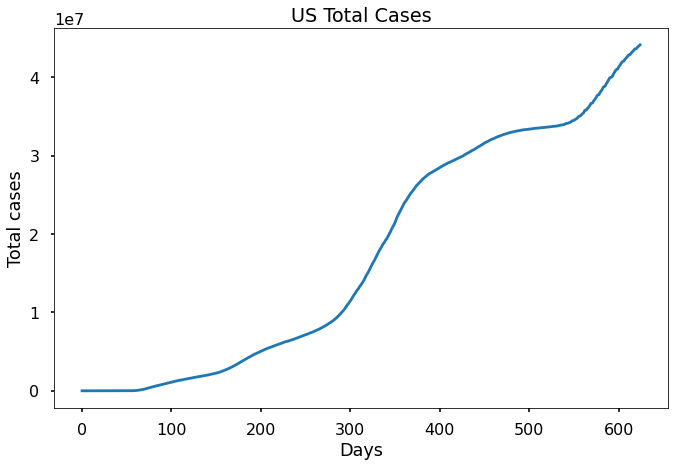

In [5]:
days = data.keys()[4:]
us_data = extract_region_data(data, 'US')
plt.plot(us_data)
plt.title('US Total Cases')
plt.xlabel('Days')
plt.ylabel('Total cases');

We start from day 50ish since the US doesn't have any reported cases until about March, so it doesn't really make sense to include days whose values are zero in our estimate for $\beta$. We're also not using the whole dataset for our estimate. The outbreak seems to be pretty steady and constant for the first 80 days or so from when it started. These choices were completely arbitrary.

Text(0.5, 1.0, 'United States')

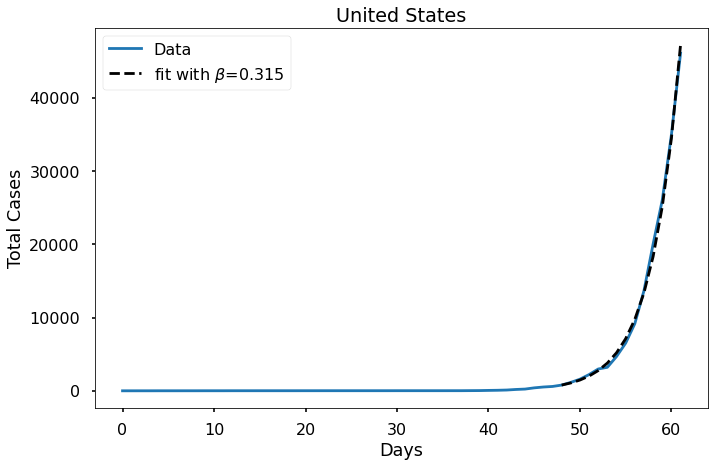

In [6]:
dd = np.arange(len(days))
beta = exponential_beta_fit(us_data, 48)
plot_fit(us_data, beta, start=48)
plt.title('United States')

The above fit seems reasonable. But, how would the prediction fair over the next 20 days? 

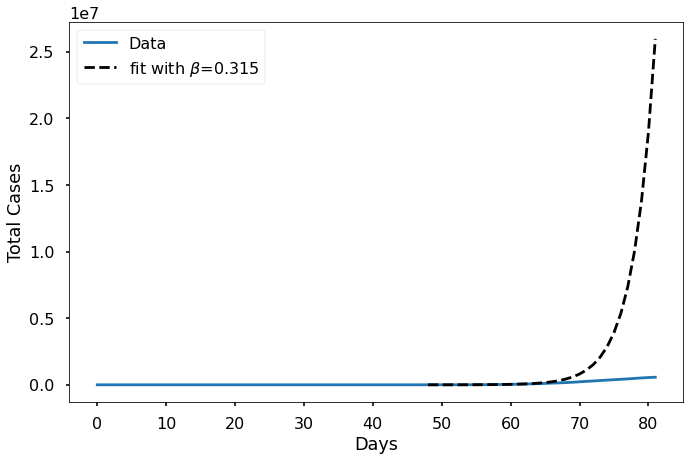

In [7]:
plot_fit(us_data, beta, start=48, n=34)

Well, it looks like the prediction isn't very accurate after about a month or so. This is because our assumption that the disease spreads at an exponential rate is only really valid at the start of the outbreak. Additionally, society took measures to try and minimize $\beta$ at the start (after about 7 months though, the US sort of stopped caring).

# Spain Data

(0.0, 500000.0)

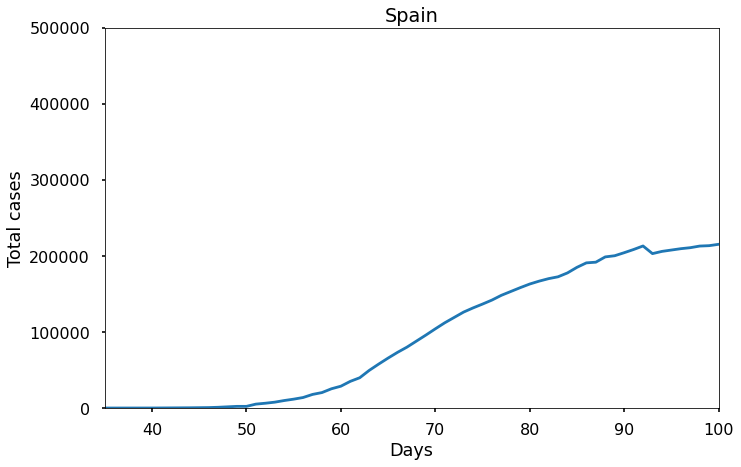

In [42]:
spain_data = extract_region_data(data, 'Spain')
plt.plot(spain_data)
plt.title('Spain')
plt.xlabel('Days')
plt.ylabel('Total cases');
plt.xlim([35, 100])
plt.ylim([0, 500000])

Text(0.5, 1.0, 'Spain')

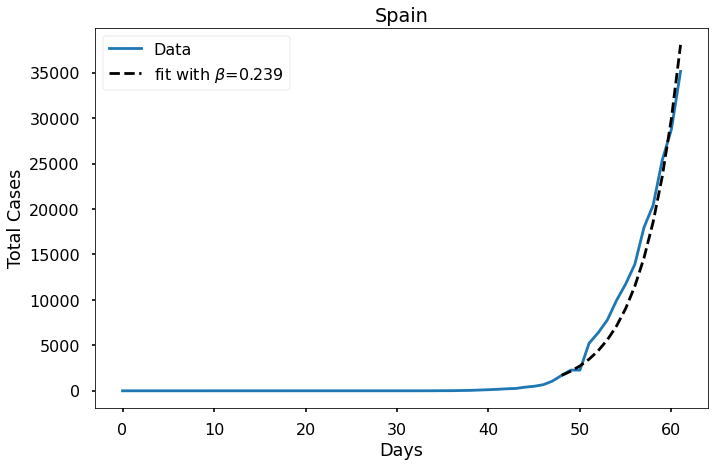

In [43]:
beta = exponential_beta_fit(spain_data, 48)
plot_fit(spain_data, beta, start=48)
plt.title('Spain')

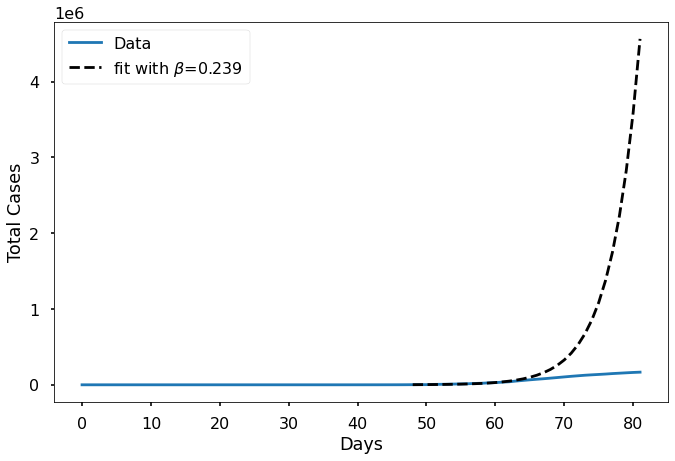

In [44]:
plot_fit(spain_data, beta, start=48, n=34)

# New Zealand

(0.0, 110.0)

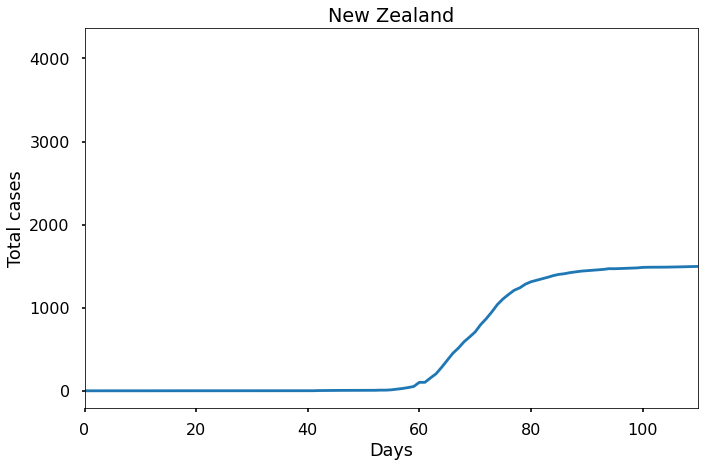

In [46]:
zealand_data = extract_region_data(data, 'New Zealand')
plt.plot(zealand_data)
plt.title('New Zealand')
plt.xlabel('Days')
plt.ylabel('Total cases');
plt.xlim([0, 110])

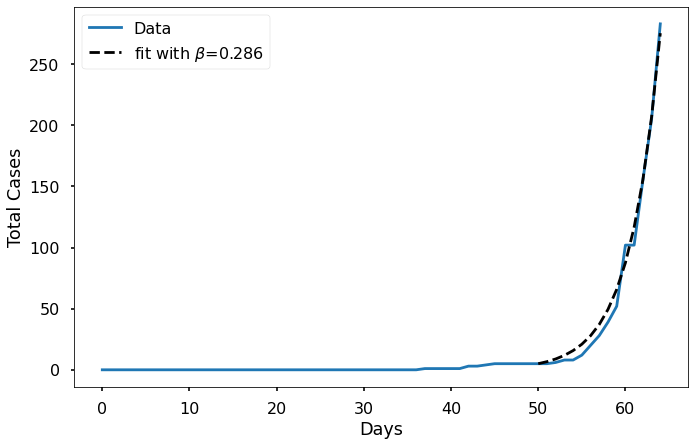

In [58]:
beta = exponential_beta_fit(zealand_data, 50, n=15)
plot_fit(zealand_data, beta, start=50, n=15)

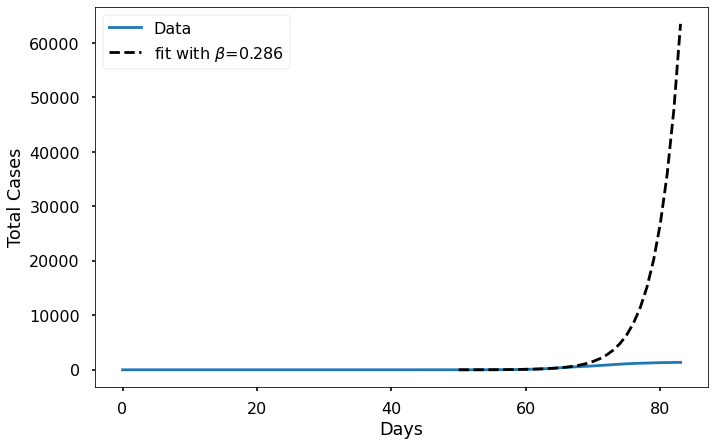

In [59]:
plot_fit(zealand_data, beta, start=50, n=34)

One thing to note here, is that much like South Korea (from blog post 2), New Zealand has drastically reduced the value of $\beta$. This is because when New Zealand was first struck by COVID, the country responded by going into full lock down for roughly 2-3 months (from end of February to mid May). Social gatherings were banned, nonessential businesses were forced to shut down, and internal travel was restricted. But, this allowed the country to reopen much quicker than other countries (the lockdown was officially declared over in June 2020). This data is all a little out of date, though (the article of reference https://www.brookings.edu/research/policy-and-institutional-responses-to-covid-19-new-zealand/ was written on Jan. 24 2021). With the delta variant, the country might have gone into lockdown again; however, after the lockdown was lifted in June 2020, no new cases were reported for 18 days.

# Predictions without Mitigation

The first scenario we will be looking at is a scenario in which no mitigation is offered. This means that schools and businesses will remain open, social gatherings aren't banned, people don't wear masks, ect... We will note that **these predictions are not what we expect to actually happen, due to intentionally ignoring mitigation techniques.**

Here are our assumptions that lead to the predictions below:

* the COVID-19 pandemic follows the SIR model, with parameters $\beta \approx 0.275$ (with the data that I have observed from above) and $\gamma \approx 0.05$.
* no containment measures (e.g. quarantine, mask mandates, social distancing) are implemented.
* the number of confirmed cases at present is about 15% of actual cases (rough estimate based on some expert opinions)

**Links**

* https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/burden.html
* https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200327-sitrep-67-covid-19.pdf?sfvrsn=b65f68eb_4
* https://www.worldometers.info/coronavirus/coronavirus-cases/#recovered
* https://ethz.ch/content/dam/ethz/special-interest/usys/ibz/theoreticalbiology/education/learningmaterials/701-1424-00L/sir.pdf
* https://www.acpjournals.org/doi/10.7326/m20-0504 (incubation period)
* https://docs.idmod.org/projects/emod-hiv/en/latest/model-seir.html (SEIR and SEIRS modeling)
* https://www.frontiersin.org/articles/10.3389/fpubh.2020.00230/full (SEIR modeling for Italy)

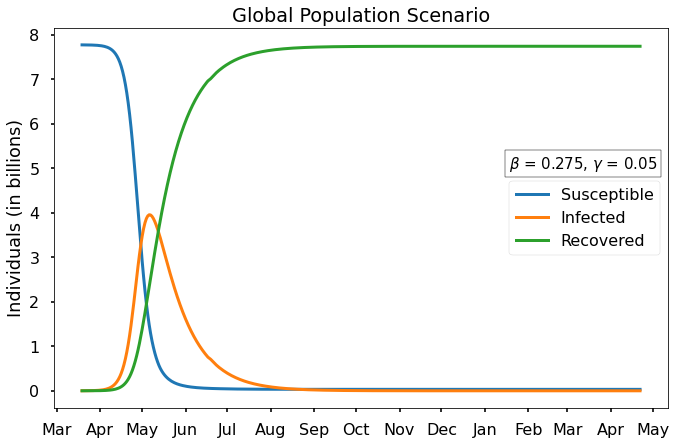

In [123]:
plot_SIR(beta=0.275, gamma=0.05, title='Global Population Scenario')

Here are the key take aways:

## When does the maximum number of infections occur, and how high is it?

As expected (with no mitigation implemented), the growth is exponential and eventually levels off and begins to decrease after most of the population has been infected. From the first blog post, we should expect the infection peak to occur when the fraction of susceptible individuals is $\frac{\gamma}{\beta} = \frac{0.05}{0.275} = 0.18$ or when roughly 82% of the world population has already been infected (which includes those who have recovered). We will note that this fraction changes with different values of $\beta$. 

With our current values, this peak occurs around the first couple weeks of May, resulting in nearly 4 billion concurrent cases. Now, the vast majority of cases would need medical attention, and with our estimate of 15% reporting and less than 20% of reported cases being severe, it would seem logical that only about 3% of all cases would need medical care. With that in mind, that would mean there would be approximately 120 million cases requiring medical attention simultaneously. In Idaho, some of the bigger hospitals only have about 300 beds. This is also excluding other medical emergencies, such as car accidents, heart attacks, shootings, ect... which could potentially result in even more death.

## How many people catch the virus?

With this model, just about everyone in the world is eventually infected; after about a year, only 50 million susceptible individuals are remaining.

## How long does the epidemic last?

It is clear that after mid-May, the epidemic begins to trail off gradually. However, it is not until about November that the number of infected drops below 1 million. Therefore (in this model), we would expect the severe portion of the epidemic to last at least several months (from mid-March to mid Fall). However, those who have recovered to resume their daily lives in the early Fall.

# Variations on the global scenario

Previously we have noted that there is a significant uncertainty in the value of $\beta$. Next, we will look at how the predictions change as $\beta$ is varied between $0.2 - 0.3$:

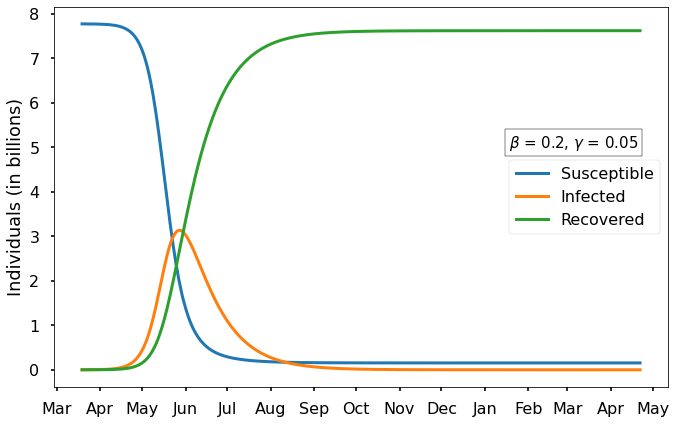

In [34]:
s, i, r = SIR(beta=0.2)
plot_SIR(s, i, r, beta=0.2)

With $\beta = 0.2$, the virus spreads more slowly. The peak instead occurs near the start of June with around 3 billion people being infected. Just like with the previous scenario, the infected count begins to trail off and the number of susceptible individuals drops. Additionally, nearly the entire global population becomes infected, with around 150 million people remaining susceptible and the number of cases doesn't drop below 1 million until November.

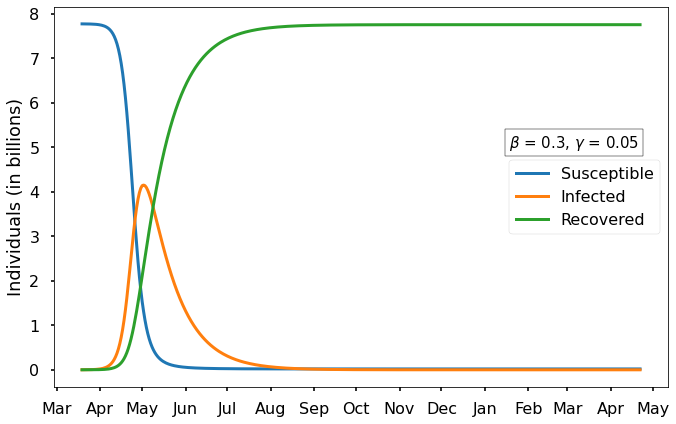

In [33]:
s, i, r = SIR(beta=0.3)
plot_SIR(s, i, r, beta=0.3)

With $\beta = 0.3$, the virus spreads more quickly. The peak occurs near the start of May, exceeding 4 billion infected. The severe period of the epidemic ends a little bit sooner, with the number of infected dropping below 1 million around October. Only 19 million people remain susceptible after a year.

Even with these variations in $\beta$, the picture is more or less the same: the epidemic peaks near the start of summer (mid-May or early June) and will last into Fall.

# Mitigation Effects

As we all know, countries don't really just sit around and wait for epidemics to make their way through the population. Instead, they implement measures to reduce the spread of the disease. This can be done by mandating the wearing of masks, closing schools and workplaces, and quarantining infected individuals and all the people they contacted. 

These measures can effectively be viewed as reducing the value of $\beta$. In other words, reducing the average number of people that an infected individual comes into close contact with in a single day. The factor $\beta$ is a constant in our model, but we can incorporate mitigation techniques in our model by introducing a new factor $q(t) \in [0, 1]$ and multiplying that with $\beta$. Like so:

\begin{align}
\frac{dS}{dt} & = -q(t)\beta I \frac{S}{N} \\
\frac{dI}{dt} & = q(t)\beta I \frac{S}{N}-\gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

In this updated model, $q(t)$ essentially represents mitigation techniques used to reduce $\beta$. As an example, if we consider $q = 0$, then that means infected individuals never come into close contact with anyone until they have recovered. In other words, an absolute quarantine. Also consider $q = 1$. This is where no mitigation measures are taken (like in our earlier SIR modeling on the global population). However, in the real world, $q$ would be between these values and will change from country to country (or even state to state, like with the United States).

Now, what can we consider to the correct value of $q$? In all honesty, it's sort of a guessing game. Individuals are able to make their own decisions. As such, there are cases where these individuals decide not to quarantine, wear a mask, or protest lockdowns (which, ironically spreads the disease by amplifying $\beta$ for a brief time). We can, however, look at some values of $q$ and explore the impact of implementing mitigation techniques. To make things simple, we will assume that $q < 1$ is achieved through mitigation measures with these measures lasting $N_q$ days. After $N_q$ days, the measures are lifted and $\beta$ returns to its normal value. Now, if $N_q = \infty$ this would be the same as reduing the value of $\beta$.

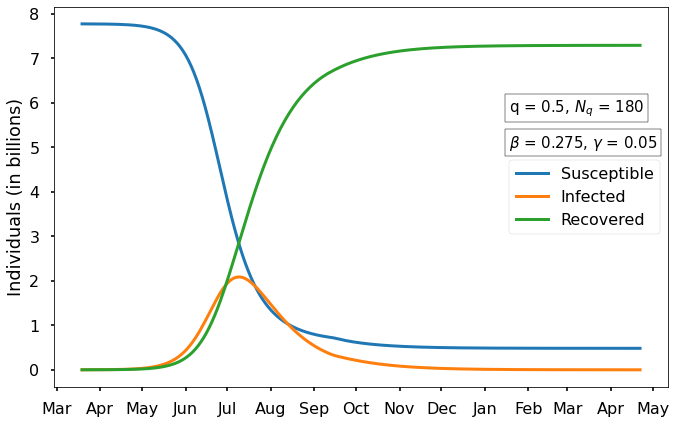

In [32]:
s, i, r = SIR(q=0.5, q_end=180)
plot_SIR(s, i, r, beta=0.275, q=0.5, Nq=180)

Here, we have limited contact by 50% for 180 days. We can see that mitigation has a substantial difference. Before, when there was no mitigation, we saw the peak reach nearly 4 billion near the start of May. With mitigation in place, we have reduced the peak to roughly 2 billion and delayed it till the first couple weeks of July. The number of concurrent infected individuals peters off around November/December (about the start of winter); the number of susceptible individuals stays around 500 million well into the next year though. Like before, it is true that just about every individual gets the infection, but the disease makes its way through the population at a much slower rate.

Now let's look at an even stronger mitigation, by reducing human contact by two-thirds ($q = 0.33$). Measures last for 180 days like before.

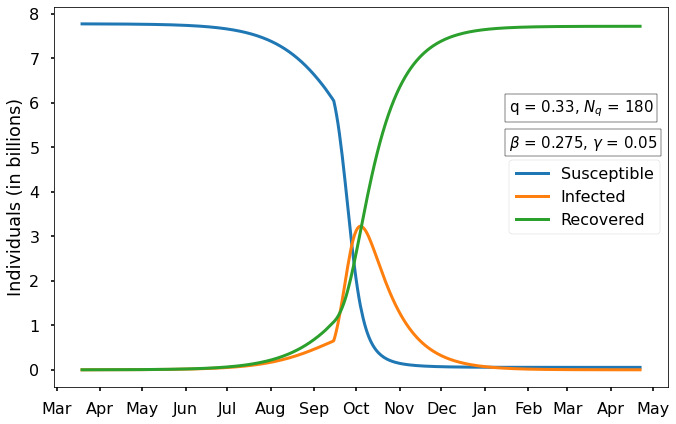

In [31]:
s, i, r = SIR(q=0.33, q_end=180)
plot_SIR(s, i, r, beta=0.275, q=0.33, Nq=180)

As expected, the initial growth is even slower. But, there's an interesting consequence: the infection peaks around the start of October and is even worse than before. This is a couple weeks after the restrictions have been lifted (around the middle of September). The result might seem counter intuitive, but it actually makes sense. Since we reduced human contact quite substantially, the number of infected individuals grew quite slowly. But, that means that the number of susceptible individuals remained at a higher value and was still quite substantial when the restrictions were lifted, allowing the disease to spread as if no restrictions were in place. Really, all this did was change when the peak happened. 

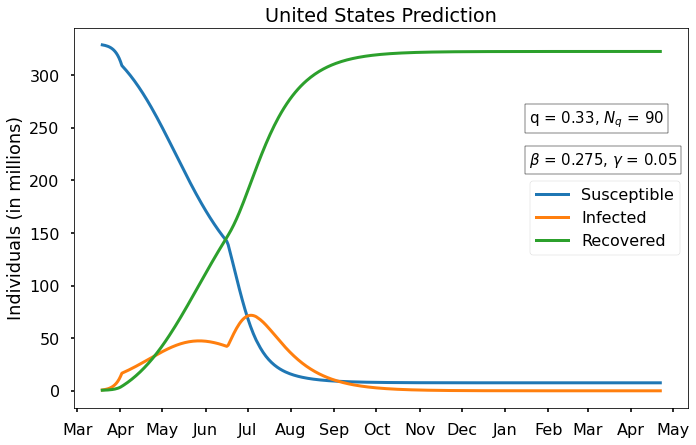

In [55]:
s, i, r = SIR(beta=0.315, N=330000000, q=0.33, q_start=14, q_end=90)
plot_SIR(s, i, r, beta=0.275, q=0.33, Nq=90, 
        reduction=1.e6, beta_gamma_loc=215, q_Nq_loc=255,
        ylabel='Individuals (in millions)', title='United States Prediction')

# SEIR Modeling

One of the limitations with the SIR model is that it doesn't take into account the amount of time required to become infectious after being exposed. In other words, there is a window of time where an individual has been exposed to the disease, but they are not yet infectious to others.

The model SEIR introduces a new compartment E with this idea in mind. Susceptible individuals who have been exposed move into this population and exit it after they are fully contagious to others (i.e. infected). This model is presented in the differential equations below:

\begin{align}
\frac{dS}{dt} & = -\frac{\beta S I}{N} \\
\frac{dE}{dt} & = \frac{\beta S I}{N} - \sigma E \\
\frac{dI}{dt} & = \sigma E - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

As with the SIR model, the differential equations for $S$ and $R$ are the same. Instead, we've introduced latency here with $E$, where an individual does not start spreading the disease after an incubation period for the disease (which is shown above with $\sigma$). Like with $\gamma$ in the SIR model, the incubation period is the reciprocal of the time it takes (in days) for the individual to no longer just be exposed, but infected.

COVID has an incubation period that can last from 2-14 days, giving us a range of roughly $0.07 - 0.5$. Estimates gathered at the start of the pandemic state that the median is about 5 days and more than 95% will develop symptoms within 11 days. With this in mind, a thoughtful estimate for $\sigma$ could be $\sigma = \frac{1}{5} = 0.2$ which is what we'll be using for our models.

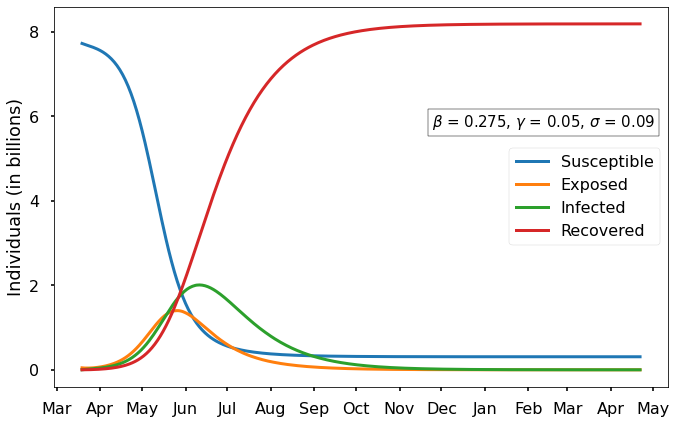

In [39]:
s, e, i, r = SEIR(beta=0.275, sigma=0.09)
plot_SEIR(s, e, i, r, sigma=0.09, beta=0.275)

# Functions

In [38]:
def extract_region_data(data, region):
    days = data.keys()[4:]
    tophalf = data.iloc[:]
    rows = tophalf['Country/Region'].isin([region])
    region_data = [tophalf[day][rows].sum() for day in days]
    return region_data

def exponential_beta_fit(cases, start, n=14):
    dd = np.arange(start + n)
    def resid(beta):
        prediction = cases[start] * np.exp(beta * (dd-start))
        return prediction[start:start+n] - cases[start:start+n]
    
    soln = optimize.least_squares(resid, 0.2)
    beta = soln.x[0]
    return beta

def plot_fit(cases, beta, start, n=14):
    length = start + n
    dd = np.arange(length)
    plt.plot(cases[:length])
    prediction = cases[start] * np.exp(beta * (dd-start))
    plt.plot(dd[start:length], prediction[start:length], '--k')
    plt.legend(['Data', r'fit with $\beta$={:.3f}'.format(beta)])
    plt.xlabel('Days')
    plt.ylabel('Total Cases')

def SIR(beta=0.275, gamma=0.05, N=7770000000, confirmed_fraction=0.15,
       days=400, q=1, q_start=0, q_end=0):
    du = np.zeros(3)
    u0 = np.zeros(3)
    
    def f(t, u):
        q_val = q if t >= q_start and t < q_end else 1
        du[0] = -q_val * beta * u[1] * u[0]/N
        du[1] = q_val * beta * u[1] * u[0]/N - gamma * u[1]
        du[2] = gamma * u[1]
        return du
    
    # number of confirmed cases as reported globally in late March 2020
    total_cases = 199258. / confirmed_fraction 
    # number of confirmed recovered individuals globally in late March 2020
    u0[2] = 81972. / confirmed_fraction
    u0[1] = total_cases - u0[2] # initial infected count
    u0[0] = N - u0[1] - u0[2] # initial susceptible count
    
    times = np.arange(0, days)
    solution = solve_ivp(f, [0, days], u0, t_eval=times, method='RK23')
    S = solution.y[0,:]
    I = solution.y[1,:]
    R = solution.y[2,:]

    return S, I, R

def plot_SIR(s, i, r, beta=0.25, gamma=0.05, T=400, 
             q=None, Nq=None, reduction=1.e9,
             beta_gamma_loc=5, q_Nq_loc=5.8,
             start_date='2020-03-19', 
             title=None, ylabel='Individuals (in billions)'):
    start = dates.datestr2num(start_date)
    my_dates = np.arange(T) + start

    plt.plot_date(my_dates, s / reduction, '-', lw=3)
    plt.plot_date(my_dates, i / reduction, '-', lw=3)
    plt.plot_date(my_dates, r / reduction, '-', lw=3)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
    plt.legend(['Susceptible', 'Infected', 'Recovered'])
    plt.ylabel(ylabel)
    plt.text(18645, beta_gamma_loc, r'$\beta$ = {}, $\gamma$ = {}'.format(beta, gamma),
            fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
    if q and Nq:
        plt.text(18645, q_Nq_loc, r'q = {}, $N_q$ = {}'.format(q, Nq),
                fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
    if title:
        plt.title(title)
    plt.show()

def SEIR(beta=0.275, gamma=0.05, sigma=0.2, N=7770000000, confirmed_fraction=0.15,
        days=400, q=1, q_start=0, q_end=0):
    du = np.zeros(4)
    u0 = np.zeros(4)
    
    def f(t, u):
        q_val = q if t >= q_start and t < q_end else 1
        du[0] = -q_val * beta * u[1] * u[0] / N
        du[1] = q_val * beta * u[2] * u[0] / N - sigma * u[1]
        du[2] = sigma * u[1] - gamma * u[2]
        du[3] = gamma * u[2]
        return du
    
    # number of confirmed cases as reported globally in late March 2020
    total_cases = 199258. / confirmed_fraction 
    # number of confirmed recovered individuals globally in late March 2020
    u0[3] = 81972. / confirmed_fraction
    u0[2] = total_cases - u0[3] # initial infected count
    u0[1] = u0[2] * 60 # initial exposed count
    u0[0] = N - u0[1] - u0[2] - u0[3] # initial susceptible count
    
    times = np.arange(0, days)
    solution = solve_ivp(f, [0, days], u0, t_eval=times, method='RK23')
    S = solution.y[0,:]
    E = solution.y[1,:]
    I = solution.y[2,:]
    R = solution.y[3,:]

    return S, E, I, R

def plot_SEIR(s, e, i, r, beta=0.25, gamma=0.05, sigma=0.2, T=400, 
              q=None, Nq=None, reduction=1.e9,
              beta_gamma_loc=5.75, q_Nq_loc=5.8,
              start_date='2020-03-19', 
              title=None, ylabel='Individuals (in billions)'):
    start = dates.datestr2num(start_date)
    my_dates = np.arange(T) + start

    plt.plot_date(my_dates, s / reduction, '-', lw=3)
    plt.plot_date(my_dates, e / reduction, '-', lw=3)
    plt.plot_date(my_dates, i / reduction, '-', lw=3)
    plt.plot_date(my_dates, r / reduction, '-', lw=3)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
    plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
    plt.ylabel(ylabel)
    plt.text(18590, beta_gamma_loc, 
             r'$\beta$ = {}, $\gamma$ = {}, $\sigma$ = {}'.format(beta, gamma, sigma),
            fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
    if q and Nq:
        plt.text(18590, q_Nq_loc, r'q = {}, $N_q$ = {}'.format(q, Nq),
                fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
    if title:
        plt.title(title)
    plt.show()